<a href="https://colab.research.google.com/github/lynntf/tdi_example/blob/main/tdi_example_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Comparing data of income at the county level (irs data) and the instances of protests (ACLED data) to find trends between what kinds of communities are organizing or are being occupied by organized protests.

In [25]:
from google.colab import files
uploaded = files.upload()

Saving 18incyallnoagi.csv to 18incyallnoagi.csv
Saving 18incyallagi.csv to 18incyallagi.csv
Saving USA_2020_2021_Apr09.xlsx to USA_2020_2021_Apr09 (1).xlsx


In [1]:
!ls

 18incyallagi.csv     sample_data		      USA_2020_2021_Apr09.xlsx
 18incyallnoagi.csv  'USA_2020_2021_Apr09 (1).xlsx'


In [48]:
import pandas as pd
protest_data = pd.read_excel('USA_2020_2021_Apr09.xlsx')
cdata = pd.read_csv('18incyallnoagi.csv') # county irs data

In [27]:
# United States of America Python Dictionary to translate States,
# Districts & Territories to Two-Letter codes and vice versa.
#
# https://gist.github.com/rogerallen/1583593
#
# Dedicated to the public domain.  To the extent possible under law,
# Roger Allen has waived all copyright and related or neighboring
# rights to this code.

us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

# thank you to @kinghelix and @trevormarburger for this idea
abbrev_us_state = dict(map(reversed, us_state_abbrev.items()))

In [49]:
key = 'ADMIN1'
protest_data[key] = protest_data[key].apply(lambda x: us_state_abbrev.get(x))

In [51]:
protest_data = protest_data.dropna(axis=0,subset=['ADMIN2'])

In [59]:
key = 'ADMIN2'
for i in protest_data.index:
  try:
    if protest_data.loc[i][key][0:5] == 'Saint':
      print(protest_data.loc[i][key][6:])
      protest_data.at[i,key] = protest_data.loc[i][key][6:]
    if protest_data.loc[i][key] == 'St. Louis City':
      protest_data.at[i,key] = 'Louis city'
      print(protest_data.loc[i][key])

  except:
    print(protest_data.loc[i][key])

key = 'COUNTYNAME'
for i in cdata.index:
  if cdata.loc[i][key][0:3] == 'St.':
    cdata.at[i,key] = cdata.loc[i][key][4:]
    print(cdata.loc[i][key])
  # if cdata.loc[i,key].split(' ')[-1][:4] == 'Coun':
  #   cdata.at[i,key] = cdata.loc[i,key].split(' ')[:-1]

In [60]:
print(cdata[cdata['STATE'] == 'MO']['COUNTYNAME'])

1507           Missouri
1508       Adair County
1509      Andrew County
1510    Atchison County
1511     Audrain County
             ...       
1618       Wayne County
1619     Webster County
1620       Worth County
1621      Wright County
1622         Louis city
Name: COUNTYNAME, Length: 116, dtype: object


In [61]:
key = 'ADMIN2'
protest_data[key] = protest_data[key].apply(lambda x: str(x)[:3])

key = 'COUNTYNAME'
cdata[key] = cdata[key].apply(lambda x: str(x)[:3])

In [62]:
cdata.head()

,STATEFIPS,STATE,COUNTYFIPS,COUNTYNAME,AGI_STUB,N1,MARS1,MARS2,MARS4,ELF,CPREP,PREP,DIR_DEP,N2,NUMDEP,TOTAL_VITA,VITA,TCE,VITA_EIC,RAC,ELDERLY,A00100,N02650,A02650,N00200,A00200,N00300,A00300,N00600,A00600,N00650,A00650,N00700,A00700,N00900,A00900,N01000,A01000,N01750,A01750,...,N07225,A07225,N07260,A07260,N09400,A09400,N85770,A85770,N85775,A85775,N09750,A09750,N10600,A10600,N59660,A59660,N59720,A59720,N11070,A11070,N10960,A10960,N11560,A11560,N06500,A06500,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11900,A11900,N11902,A11902,N12000,A12000
0,1,AL,0,Ala,0,2062010.0,866700.0,756360.0,394890.0,1869810.0,97990.0,1139390.0,1368530.0,4079460.0,1387360.0,46350.0,30520.0,15820.0,7270.0,401630.0,515520.0,124361450.0,2054840.0,125693998.0,1706830.0,87248133.0,538540.0,969953.0,274940.0,2175917.0,253120.0,1684440.0,282230.0,385171.0,360340.0,3246542.0,238650.0,5421086.0,498490.0,14446144.0,...,567600.0,1059318.0,13250.0,25067.0,252860.0,693275.0,89810.0,806534.0,98010.0,873324.0,33190.0,26196.0,1963700.0,17782443.0,481610.0,1348658.0,440450.0,1208046.0,364920.0,631413.0,124120.0,112554.0,31440.0,25372.0,1275330.0,13092538.0,1419720.0,14112810.0,30280.0,51999.0,39030.0,156011.0,392810.0,1801380.0,1614620.0,5450578.0,1581360.0,4771103.0,41550.0,661254.0
1,1,AL,1,Aut,0,24360.0,9670.0,10050.0,4020.0,22000.0,1310.0,11060.0,16970.0,49940.0,17170.0,480.0,150.0,310.0,20.0,4750.0,5660.0,1421008.0,24300.0,1433014.0,20560.0,1059239.0,7390.0,7151.0,3030.0,11548.0,2790.0,8518.0,3330.0,3342.0,3750.0,26796.0,2590.0,32160.0,6340.0,194819.0,...,7550.0,15741.0,120.0,196.0,2610.0,6548.0,900.0,7629.0,970.0,8183.0,350.0,261.0,23480.0,171844.0,4870.0,13304.0,4410.0,12008.0,3960.0,6874.0,1450.0,1317.0,320.0,230.0,15890.0,122224.0,17310.0,131036.0,160.0,127.0,270.0,743.0,4640.0,16492.0,19220.0,56946.0,18940.0,54557.0,360.0,2316.0
2,1,AL,3,Bal,0,100970.0,42240.0,43370.0,12890.0,90270.0,5410.0,50160.0,59960.0,196030.0,58070.0,2020.0,250.0,1770.0,50.0,14910.0,31900.0,6932600.0,100560.0,7022633.0,77300.0,4314569.0,30680.0,59937.0,19140.0,143136.0,17560.0,103446.0,13590.0,19600.0,19570.0,250979.0,17730.0,414734.0,29300.0,961799.0,...,25080.0,53044.0,430.0,874.0,14790.0,45163.0,5750.0,51216.0,6420.0,56565.0,2170.0,1909.0,94020.0,961301.0,17010.0,43576.0,14830.0,37321.0,13030.0,22598.0,4220.0,3823.0,2120.0,2035.0,67430.0,796040.0,74350.0,858857.0,1830.0,3091.0,2620.0,8318.0,24360.0,137644.0,72730.0,237520.0,70150.0,198728.0,3300.0,38792.0
3,1,AL,5,Bar,0,9050.0,3640.0,2790.0,2490.0,8240.0,390.0,5970.0,5790.0,17900.0,6460.0,90.0,90.0,0.0,20.0,2300.0,2440.0,397058.0,9020.0,400492.0,7510.0,277667.0,2030.0,3044.0,990.0,5746.0,910.0,4592.0,750.0,756.0,1470.0,7461.0,850.0,12440.0,2090.0,52646.0,...,2370.0,3344.0,20.0,33.0,970.0,2104.0,360.0,3126.0,410.0,3548.0,130.0,92.0,8590.0,52592.0,3040.0,9079.0,2840.0,8310.0,2180.0,3692.0,580.0,525.0,100.0,58.0,4780.0,33020.0,5470.0,35972.0,30.0,50.0,60.0,262.0,1370.0,4588.0,7410.0,24417.0,7300.0,23585.0,130.0,670.0
4,1,AL,7,Bib,0,7830.0,2980.0,3160.0,1540.0,7020.0,400.0,4440.0,5400.0,16400.0,5810.0,30.0,30.0,0.0,0.0,1750.0,1760.0,403044.0,7800.0,405944.0,6620.0,296969.0,1560.0,1594.0,500.0,1776.0,430.0,1207.0,790.0,797.0,1190.0,7047.0,460.0,8172.0,1640.0,40186.0,...,2370.0,4612.0,70.0,114.0,870.0,1707.0,270.0,2554.0,290.0,2680.0,150.0,94.0,7450.0,46630.0,2040.0,5768.0,1880.0,5198.0,1570.0,2776.0,330.0,306.0,90.0,42.0,4740.0,35250.0,5320.0,37474.0,0.0,0.0,40.0,75.0,1250.0,8637.0,6370.0,19927.0,6300.0,19071.0,80.0,779.0


In [63]:
n1 = []
agi = []
for i in protest_data.index:
  try:
    n1.append(cdata[(protest_data.loc[i]['ADMIN1'] == cdata['STATE']) & (protest_data.loc[i]['ADMIN2'] == cdata['COUNTYNAME']) & (cdata['COUNTYFIPS'] != 0)]['N1'].values[0])
    agi.append(cdata[(protest_data.loc[i]['ADMIN1'] == cdata['STATE']) & (protest_data.loc[i]['ADMIN2'] == cdata['COUNTYNAME']) & (cdata['COUNTYFIPS'] != 0)]['A00100'].values[0])
  except:
    print(protest_data.loc[i]['ADMIN1'], protest_data.loc[i]['ADMIN2'])
    n1.append(0)
    agi.append(0)

LA La 
LA La 
MO  Ge


In [64]:
cdata[(protest_data.loc[i]['ADMIN1'] == cdata['STATE']) & (protest_data.loc[i]['ADMIN2'] == cdata['COUNTYNAME'])]

,STATEFIPS,STATE,COUNTYFIPS,COUNTYNAME,AGI_STUB,N1,MARS1,MARS2,MARS4,ELF,CPREP,PREP,DIR_DEP,N2,NUMDEP,TOTAL_VITA,VITA,TCE,VITA_EIC,RAC,ELDERLY,A00100,N02650,A02650,N00200,A00200,N00300,A00300,N00600,A00600,N00650,A00650,N00700,A00700,N00900,A00900,N01000,A01000,N01750,A01750,...,N07225,A07225,N07260,A07260,N09400,A09400,N85770,A85770,N85775,A85775,N09750,A09750,N10600,A10600,N59660,A59660,N59720,A59720,N11070,A11070,N10960,A10960,N11560,A11560,N06500,A06500,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11900,A11900,N11902,A11902,N12000,A12000
63,1,AL,125,Tus,0,83000.0,36730.0,27470.0,16970.0,74850.0,3740.0,41560.0,55630.0,160770.0,56040.0,1970.0,1310.0,660.0,480.0,16940.0,18600.0,5033282.0,82790.0,5084217.0,70800.0,3521527.0,21120.0,37476.0,10400.0,83949.0,9560.0,65522.0,11510.0,16252.0,13520.0,87357.0,8880.0,214734.0,18380.0,537491.0,...,23580.0,43700.0,710.0,1463.0,8470.0,24279.0,2860.0,21532.0,3190.0,23705.0,1200.0,931.0,79500.0,719045.0,19200.0,54280.0,17790.0,50661.0,14660.0,25429.0,5810.0,5261.0,980.0,703.0,51490.0,537664.0,55780.0,574525.0,1110.0,1876.0,1570.0,6662.0,15520.0,80516.0,65570.0,223047.0,63980.0,189235.0,1980.0,33813.0


In [65]:
protest_data['N1'] = n1
protest_data['AGI'] = agi

In [70]:
protest_data['agiDn1'] = protest_data['AGI']/protest_data['N1']

In [71]:
print(protest_data['SUB_EVENT_TYPE'].unique())

['Peaceful protest' 'Other' 'Protest with intervention'
 'Change to group/activity' 'Arrests' 'Attack' 'Mob violence'
 'Looting/property destruction' 'Excessive force against protesters'
 'Violent demonstration' 'Disrupted weapons use' 'Armed clash'
 'Sexual violence' 'Remote explosive/landmine/IED' 'Suicide bomb'
 'Grenade']


In [130]:
q = []
p = []
r = []
for s in protest_data['ADMIN1'].unique():
  for c in protest_data[protest_data['ADMIN1'] == s]['ADMIN2'].unique():
    t = protest_data[(protest_data['ADMIN1'] == s) & (protest_data['ADMIN2'] == c)]['SUB_EVENT_TYPE']
    try:
      x = t.value_counts()['Peaceful protest']/len(t)
      z = len(t)
      # print(x)
      y = cdata[(s == cdata['STATE']) & (c == cdata['COUNTYNAME']) & (cdata['COUNTYFIPS'] != 0)]['A00100'].values[0]/cdata[(s == cdata['STATE']) & (c == cdata['COUNTYNAME']) & (cdata['COUNTYFIPS'] != 0)]['N1'].values[0]
      # print(y)
      # print(x)
      q.append(x)
      p.append(y)
      r.append(z)
    except:
      pass

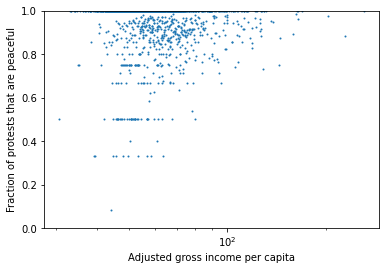

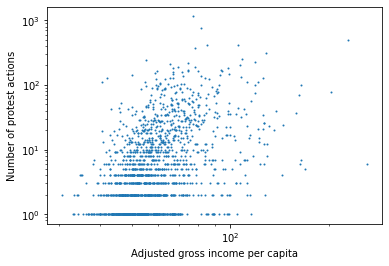

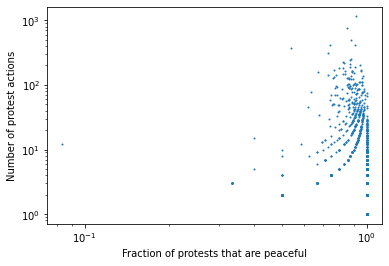

In [135]:
import matplotlib.pyplot as plt
plt.scatter(p,q, s=1)
plt.ylabel('Fraction of protests that are peaceful')
plt.xlabel('Adjusted gross income per capita')
# plt.xlim((0,2e8))
plt.ylim(0,1)
plt.xscale('log')

plt.figure()
plt.scatter(p,r, s=1)
plt.ylabel('Number of protest actions')
plt.xlabel('Adjusted gross income per capita')
plt.yscale('log')
plt.xscale('log')

plt.figure()
plt.scatter(q,r, s=1)
plt.ylabel('Number of protest actions')
plt.xlabel('Fraction of protests that are peaceful')
plt.yscale('log')
plt.xscale('log')

In [78]:
protest_data[(protest_data['ADMIN1'] == s) & (protest_data['ADMIN2'] == c)]['SUB_EVENT_TYPE'].value_counts()

2

In [66]:
# This is not necessary since the county data is already in the protest data, only need to do a lookup on that data that's already there! :)
# # county_fips_np = [] # not classified as peaceful
# for i in protest_data[protest_data['SUB_EVENT_TYPE'] != 'Peaceful protest'].index[]:
#   (lat,lon) = protest_data.loc[i,['LATITUDE','LONGITUDE']]
#   # print(lat, lon)
#   county_fips_np.append( requests.get('https://geo.fcc.gov/api/census/block/find?latitude={}&longitude={}&format=json'.format(lat, lon)).json()['County']['FIPS'])
# print(county_fips)
# # fips is divided into two digits for state and then three digits for the county in that state

In [65]:
sFIPS = [int(x[0:2]) for x in county_fips]
cFIPS = [int(x[2:]) for x in county_fips]

print(sFIPS)
print(cFIPS)
x = cdata.query('STATEFIPS == @sFIPS[0] & COUNTYFIPS == @cFIPS[0]')['A00100']

print(x[x.index[0]])

[8, 11, 48, 51, 4, 6, 55, 37, 53, 25, 51, 6, 51, 13, 32, 5, 6, 29, 24, 49, 48, 36, 36, 11, 53, 19, 12, 5, 11, 36, 11, 36, 12, 48, 41, 12, 53, 35, 53, 32, 36, 17, 24, 6, 24, 26, 36, 6, 37, 26, 36, 53, 48, 6, 51, 36, 32, 26, 6, 6, 11, 25, 53, 55, 12, 4, 6, 8, 53, 6, 27, 47, 51, 1, 12, 53, 48, 17, 53, 48, 4, 12, 12, 48, 48, 36, 6, 11, 26, 17, 45, 51, 51, 35, 6, 42, 51, 51, 12, 48, 26, 54, 39, 53, 37, 37, 20, 48, 24, 21, 24, 51, 51, 6, 51, 1, 18, 28, 41, 39, 17, 36, 25, 55, 6, 6, 35, 12, 35, 27, 34, 4, 6, 36, 51, 22, 39, 17, 15, 22, 48, 35, 41, 53, 55, 9, 25, 54, 10, 29, 22, 26, 18, 22, 16, 48, 27, 30, 8, 16, 13, 33, 17, 36, 50, 44, 17, 36, 37, 2, 17, 17, 36, 24, 51, 37, 20, 35, 37, 26, 4, 26, 11, 42, 30, 53, 32, 45, 23, 4, 47, 48, 13, 28, 53, 12, 1, 37, 17, 22, 29, 6, 45, 12, 53, 22, 6, 20, 37, 37, 48, 34, 12, 17, 6, 42, 34, 6, 6, 17, 12, 22, 16, 49, 16, 16, 4, 11, 6, 35, 6, 35, 48, 29, 6, 8, 48, 37, 12, 26, 53, 8, 6, 6, 6, 48, 17, 15, 1, 17, 22, 37, 16, 48, 13, 48, 37, 13, 28, 6, 18, 39,